In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
library(tidyverse)
library(lubridate)
library(ggplot2)
library(scales)
library(dplyr)

In [ ]:
daily_activity <-read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep_day <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
heartrate_seconds <- read_csv ("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")

In [ ]:
head(daily_activity)
head(sleep_day)
head(heartrate_seconds)

In [ ]:
daily_activity$ActivityDate <-
as.Date(daily_activity$ActivityDate, "%m/%d/%Y")
sleep_day$SleepDay <-
as.Date(sleep_day$SleepDay,"%m/%d/%Y %I:%M :%S %p")

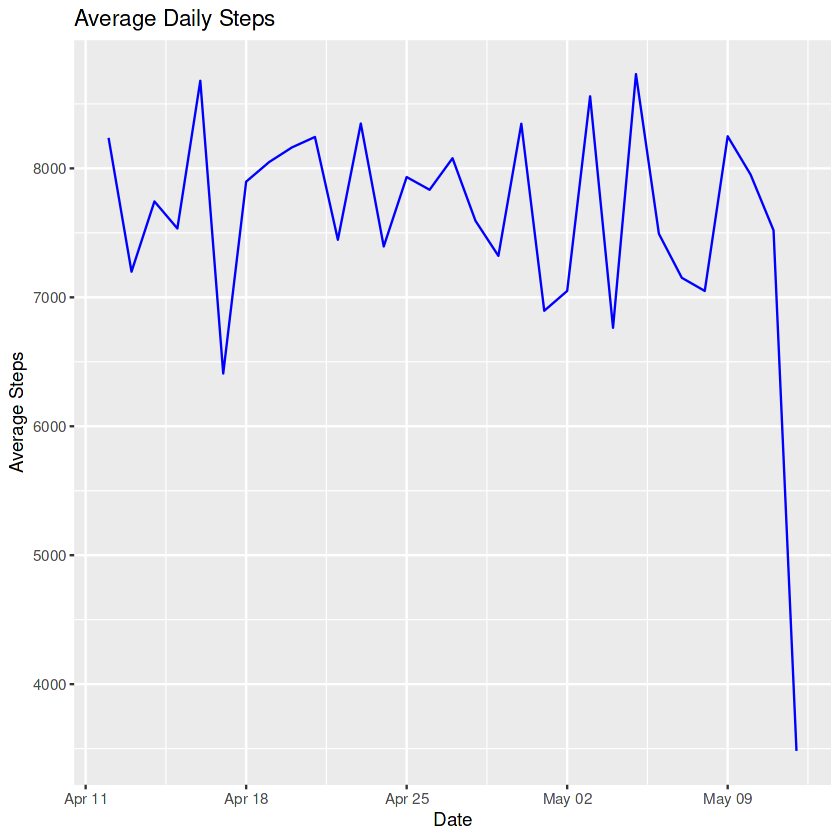

In [22]:
avg_steps <- daily_activity %>%
group_by(ActivityDate) %>%
summarise(AverageSteps = mean(TotalSteps,na.rm = TRUE))
ggplot(avg_steps, aes(x = ActivityDate, y = AverageSteps)) +
geom_line(color = "blue") +
labs(title = "Average Daily Steps", x = "Date", y = "Average Steps")

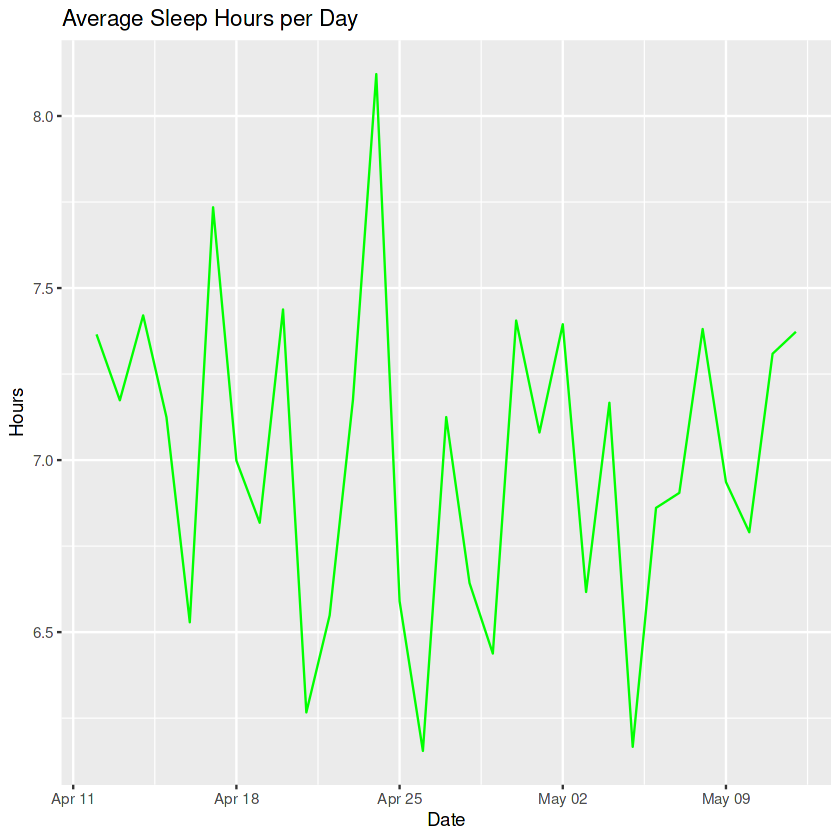

In [21]:
avg_sleep <- sleep_day %>%
group_by (SleepDay)%>%
summarise(AverageSleep =
          mean(TotalMinutesAsleep, na.rm = TRUE) / 60)
ggplot(avg_sleep, aes(x = SleepDay, y = AverageSleep)) +
geom_line(color = "green") +
labs(title = "Average Sleep Hours per Day", x = "Date", y = "Hours")